# GetAround Data Analysis 🚗

## Delay Analysis

#### Problematics : How long should the minimum delay be? Should we enable the feature for all cars? Only Connect cars?

### Librairies and imports

In [280]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [281]:
!pip install openpyxl -q
import openpyxl

## Data importation and cleaning

In [282]:
df = pd.read_excel("src\get_around_delay_analysis.xlsx")
df.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN


In [283]:
# Shape of the dataset
print("The dataset is made of", df.shape[0], "observations and", df.shape[1], "features")

The dataset is made of 21310 observations and 7 features


In [284]:
# Check basic statistics
df.describe(include="all")

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000


In [285]:
# Types of data
df.dtypes.value_counts()

float64    3
int64      2
object     2
dtype: int64

In [286]:
# Counting null values
df.isnull().sum().sort_values(ascending=False)

previous_ended_rental_id                      19469
time_delta_with_previous_rental_in_minutes    19469
delay_at_checkout_in_minutes                   4964
rental_id                                         0
car_id                                            0
checkin_type                                      0
state                                             0
dtype: int64

In [287]:
# Adding a column is_delay
df["is_delay"] = np.where(df["delay_at_checkout_in_minutes"]>=0, 1, 0)
df.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,is_delay
0,505000,363965,mobile,canceled,NaN,NaN,NaN,0
1,507750,269550,mobile,ended,-81.0,NaN,NaN,0
2,508131,359049,connect,ended,70.0,NaN,NaN,1
3,508865,299063,connect,canceled,NaN,NaN,NaN,0
4,511440,313932,mobile,ended,NaN,NaN,NaN,0


In [288]:
# Function to know the type of delay
def type_delay(x):
    if x < 0 :
        y = "Early arrival"
    elif x < 10 : 
        y = "Delay < 10 mins"
    elif x < 60 :
        y = "10 mins ≤ Delay < 60 mins"
    elif x >= 60 :
        y = "Delay ≥ 60 mins"
    else:
        y = "Not applicable"
    return y

In [289]:
# Add new column type delay 
df["type_delay"] = df["delay_at_checkout_in_minutes"].apply(lambda x: type_delay(x))
df.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,is_delay,type_delay
0,505000,363965,mobile,canceled,NaN,NaN,NaN,0,Not applicable
1,507750,269550,mobile,ended,-81.0,NaN,NaN,0,Early arrival
2,508131,359049,connect,ended,70.0,NaN,NaN,1,Delay ≥ 60 mins
3,508865,299063,connect,canceled,NaN,NaN,NaN,0,Not applicable
4,511440,313932,mobile,ended,NaN,NaN,NaN,0,Not applicable


## EDA

### Features distributions 

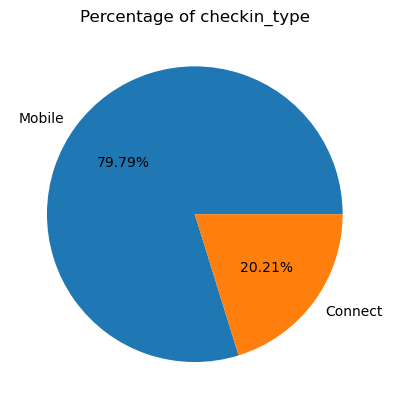

In [290]:
# Distribution of checking_type
pie_data = df["checkin_type"].value_counts()
fig, ax = plt.subplots()
ax.pie(pie_data, labels=["Mobile","Connect"], autopct="%.2f%%")
ax.set(title="Percentage of checkin_type");

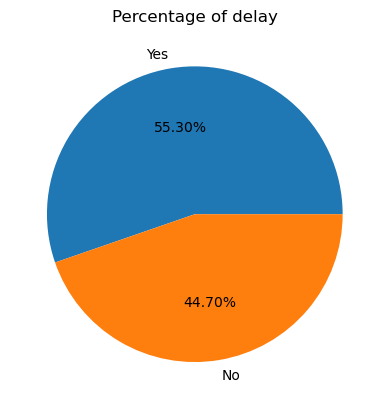

In [291]:
# Distribution of delay
pie_data = df["is_delay"].value_counts()
fig, ax = plt.subplots()
ax.pie(pie_data, labels=["Yes","No"], autopct="%.2f%%")
ax.set(title="Percentage of delay");

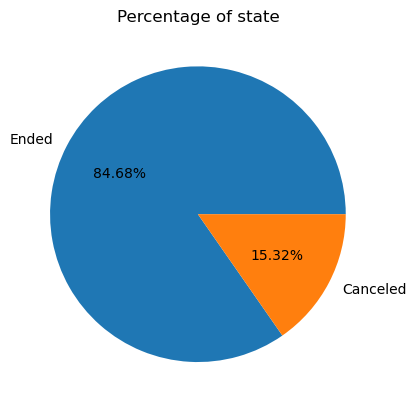

In [292]:
# Distribution of state
pie_data = df["state"].value_counts()
fig, ax = plt.subplots()
ax.pie(pie_data, labels=["Ended","Canceled"], autopct="%.2f%%")
ax.set(title="Percentage of state");

### Delay analysis

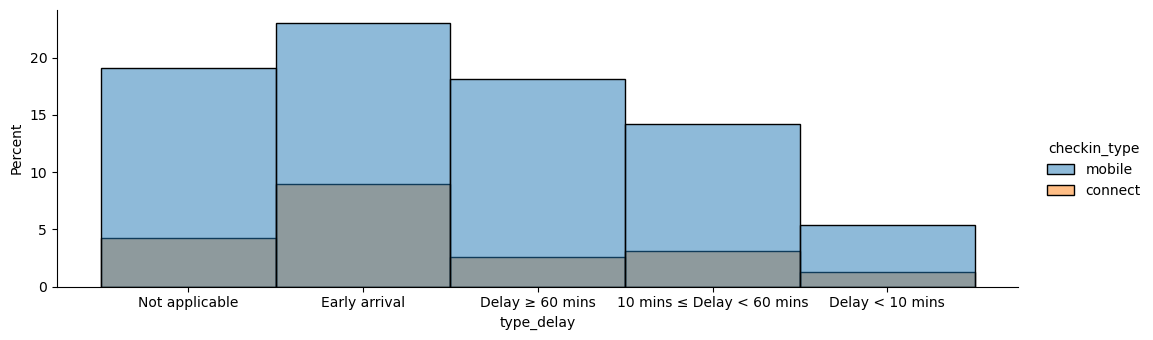

In [293]:
sns.displot(df, x= "type_delay", stat="percent", hue="checkin_type",  height=3.5, aspect=3., alpha= 0.5)
plt.show()

In [294]:
# Mean delay time
print("Global mean delay time :", round(df.loc[:,"delay_at_checkout_in_minutes"].mean()), "mins")

Global mean delay time : 60 mins


In [295]:
# Mean delay time when late
mask = (df["is_delay"] == 1)
print("Mean delay time when late :", round(df.loc[mask,"delay_at_checkout_in_minutes"].mean()), "mins")

Mean delay time when late : 199 mins


In [296]:
# Mean delay time by checkin type
df_checkin = df.groupby(df["checkin_type"])["delay_at_checkout_in_minutes"].mean()
print("Mean delay time for connect checkin :", round(df_checkin[0]), "mins")
print("Mean delay time for mobile checkin :", round(df_checkin[1]), "mins")

Mean delay time for connect checkin : -44 mins
Mean delay time for mobile checkin : 87 mins


In [297]:
mask1 = (df["is_delay"] == 1) & (df["checkin_type"] == "mobile")
mask2 = (df["is_delay"] == 1) & (df["checkin_type"] == "connect")
print("Mean delay time for late mobile checkin :", round(df.loc[mask1,"delay_at_checkout_in_minutes"].mean()), "mins")
print("Mean delay time for late connect checkin :", round(df.loc[mask2,"delay_at_checkout_in_minutes"].mean()), "mins")

Mean delay time for late mobile checkin : 221 mins
Mean delay time for late connect checkin : 79 mins


Considering these results, we would recommand the Product Manager to consider creating a threshold for the people that checkin by mobile.

In [298]:
# Look at the statistics to see if there are outliers to remove
df["delay_at_checkout_in_minutes"].describe()

count    16346.000000
mean        59.701517
std       1002.561635
min     -22433.000000
25%        -36.000000
50%          9.000000
75%         67.000000
max      71084.000000
Name: delay_at_checkout_in_minutes, dtype: float64

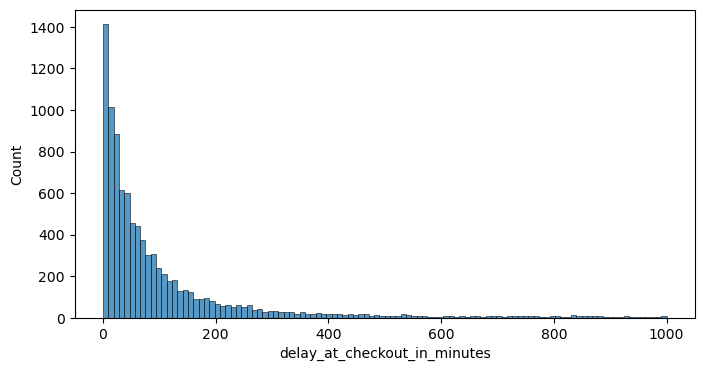

In [299]:
mask1 = df["delay_at_checkout_in_minutes"] <= 1000
mask2 = df["delay_at_checkout_in_minutes"] >= 0

plt.figure(figsize=(8,4))
sns.histplot(df.loc[mask1&mask2,:], x="delay_at_checkout_in_minutes")
plt.show()

We see that delays over 600mins are in minority, we remove these rows. 

In [300]:
mask = df["delay_at_checkout_in_minutes"] <= 600
df = df.loc[mask, :]
print("The new dataset is made of", df.shape[0], "observations and", df.shape[1], "features")

The new dataset is made of 15772 observations and 9 features


In [301]:
df["state"].value_counts()

ended       15771
canceled        1
Name: state, dtype: int64

### Impact of delay on consecutive rentals

In [302]:
# Creating new dataset to analyse consecutive rentals
df_multiple_rentals = pd.merge(df, df, how="inner", left_on = "previous_ended_rental_id", right_on = "rental_id")

In [303]:
# Removing columns we do not need
df_multiple_rentals.drop(
    [
        "delay_at_checkout_in_minutes_x",
        "rental_id_y", 
        "car_id_y", 
        "state_y",
        "time_delta_with_previous_rental_in_minutes_y",
        "previous_ended_rental_id_y",
        "is_delay_x",
        "is_delay_y",
        "type_delay_x",
        "type_delay_y"
    ], 
    axis=1,
    inplace=True
)

In [304]:
print("The new dataset is made of", df_multiple_rentals.shape[0], "observations and", df_multiple_rentals.shape[1], "features")
df_multiple_rentals.head()

The new dataset is made of 1429 observations and 8 features


,rental_id_x,car_id_x,checkin_type_x,state_x,previous_ended_rental_id_x,time_delta_with_previous_rental_in_minutes_x,checkin_type_y,delay_at_checkout_in_minutes_y
0,511639,370585,connect,ended,563782.0,570.0,connect,136.0
1,519491,312389,mobile,ended,545639.0,420.0,mobile,140.0
2,528808,181625,connect,ended,557404.0,330.0,connect,-352.0
3,533670,320824,connect,ended,556563.0,630.0,connect,23.0
4,534827,404169,mobile,ended,531158.0,90.0,mobile,29.0


In [305]:
# Keep rows where we have no missing values to analyse the delay between rentals 
mask = (df_multiple_rentals["delay_at_checkout_in_minutes_y"].notnull())
df_multiple_rentals = df_multiple_rentals.loc[mask, :]
df_multiple_rentals.reset_index(drop=True, inplace=True)

In [314]:
# Overview of rentals and consecutive rentals
print("Total number of rentals :", df.shape[0])
print("Total number of consecutive rentals :", df_multiple_rentals.shape[0])
print("Percentage of consecutive rentals :", round(df_multiple_rentals.shape[0]*100/df.shape[0],2), "%")

Total number of rentals : 15772
Total number of consecutive rentals : 1429
Percentage of consecutive rentals : 9.06 %


In [307]:
# Compute the delay between rentals
df_multiple_rentals["delay_between_rentals"] = df_multiple_rentals["time_delta_with_previous_rental_in_minutes_x"] - df_multiple_rentals["delay_at_checkout_in_minutes_y"]
df_multiple_rentals.sort_values(by ="delay_between_rentals")
df_multiple_rentals.head()

,rental_id_x,car_id_x,checkin_type_x,state_x,previous_ended_rental_id_x,time_delta_with_previous_rental_in_minutes_x,checkin_type_y,delay_at_checkout_in_minutes_y,delay_between_rentals
0,511639,370585,connect,ended,563782.0,570.0,connect,136.0,434.0
1,519491,312389,mobile,ended,545639.0,420.0,mobile,140.0,280.0
2,528808,181625,connect,ended,557404.0,330.0,connect,-352.0,682.0
3,533670,320824,connect,ended,556563.0,630.0,connect,23.0,607.0
4,534827,404169,mobile,ended,531158.0,90.0,mobile,29.0,61.0


In [308]:
df_multiple_rentals["delay_between_rentals"].describe()

count    1429.000000
mean      318.508747
std       349.901428
min      -527.000000
25%        51.000000
50%       206.000000
75%       579.000000
max      4684.000000
Name: delay_between_rentals, dtype: float64

In [316]:
mask1 = df_multiple_rentals["delay_between_rentals"] < 0
mean_delay_between_rentals = df_multiple_rentals.loc[mask1, "delay_between_rentals"].mean()
nb_rentals_impacted = df_multiple_rentals.loc[mask1, "delay_between_rentals"].count()

mask2 = mask1 & (df_multiple_rentals["checkin_type_x"] == "mobile")
nb_mobile_rentals = df_multiple_rentals.loc[mask2, "delay_between_rentals"].count()

mask3 = mask1 & (df_multiple_rentals["state_x"] == "canceled")
nb_canceled_rentals = df_multiple_rentals.loc[mask3, "delay_between_rentals"].count()

print("Mean delay between late rentals :", round(mean_delay_between_rentals), "mins")
print("Number of locations impacted by the late between rentals :", nb_rentals_impacted)
print("Number of mobile locations impacted by the late between rentals :", nb_mobile_rentals)
print("Number of locations canceled because of the delay :", nb_canceled_rentals)
print()
print("Percentage of consecutive locations impacted by the late over the total locations :", 
    round(nb_rentals_impacted*100/df.shape[0],2), "%")

Mean delay between late rentals : -44 mins
Number of locations impacted by the late between rentals : 154
Number of mobile locations impacted by the late between rentals : 107
Number of locations canceled because of the delay : 0

Percentage of consecutive locations impacted by the late over the total locations : 0.98 %


## Summary

- Majority of rentals are made via mobile checkin
- Just over half of rentals are late
- Majority of locations are not cancelled
- Mobile rentals have more delay than connect ones
- Average delay time on all rentals is 60 mins
- Average delay time is 200mins if only late rentals are counted
- About 1% of rentals are affected by a delay between two consecutive rentals, this does not necessarily lead to cancellation


## Conclusion 
- Delays are mostly present for mobile rentals, we can recommend to the Product Manager to establish a threshold for this rental scope.
- Rentals impacted by a delay between two consecutive rentals are a minority (about 1% in our study), and they do not necessarily lead to cancellation. We can inform the Product Manager that it is not necessary to set up a threshold because it would generate more losses than profits for the company and the vehicle owner.
- If the implementation of a threshold is still validated, knowing that the average duration of a delay between 2 rentals is 44 mins, we anticipate a threshold of 1h between 2 rentals. 